# Problem Statement

Organizations strive to measure, understand and minimize customer churn because the cost of acquiring new customers is significantly higher than the cost of customer retention.

Help the sales representatives and marketers can understand why customers churn, they can provide other stakeholders within the company with insight into how the organization's products and services can be improved.

Approach Used: 
    
Applied data cleaning, pre-processing and Exploratory Data Analysis by translating complex data into comprehensive visual representations and statistical techniques.

In [74]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm 

import pylab as py 

pd.set_option('display.max_rows', 50)

import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv('churn_prediction.csv')

In [4]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [5]:
data.shape

(28382, 21)

In [6]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

# Identificaiton of Data types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [10]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [9]:
data.dtypes[data.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

Summary:

Customer id are a unique number assigned to customers. It can be stored as Integer.

branch code again represents different branches, therefore it should be convereted to category.

Age and Vintage are also numbers and hence we are okay with them as integers.

customer_networth_category is supposed to be an ordinal category, should be converted to category.

churn : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This needs to be converted to category datatype.

In [11]:
# converting churn to category

data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes == 'int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

In [12]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                         float64
occupation                          object
city                               float64
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

In [13]:
data.dtypes[data.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

Summary:

dependents is expected to be a whole number. Should be changed to integer type

city variable is also a unique code of a city represented by some interger number. Should be converted to Category type

Rest of the variables like credit, balance and debit are best represented by the float variables.

In [14]:
# converting "dependents" and "city" to their respective types

data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# checking
data[['dependents', 'city']].dtypes

dependents       Int64
city          category
dtype: object

In [15]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

variables like 'gender', 'occupation' and 'last_transaction' are of type object. This means that Pandas was not able to recognise the datatype of these three variables.

In [16]:
# Manually checking object types
data[['gender', 'occupation', 'last_transaction']].head(7)

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaT
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03
5,Female,self_employed,2019-11-01
6,Male,retired,2019-09-24


In [17]:
#gender and occupation variables belong to categorical data types.
#last_transaction should be a datetime variable.

In [18]:
# typecasting "gender" and "occupation" to category type
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# checking
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

In [19]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

In [20]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"

date = pd.DatetimeIndex(data['last_transaction'])

In [21]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
data['day_of_year'] = date.dayofyear

# week of year when last transaction was done
data['week_of_year'] = date.weekofyear 

# weekofyear is deprecated
data['woy_ls_tran'] = date.strftime('%V').astype('float')
# Refer https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

# month of year when last transaction was done
data['month'] = date.month

# day of week when last transaction was done
data['day_of_week'] = date.dayofweek

<ipython-input-21-cdde1bb8610b>:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['week_of_year'] = date.weekofyear


In [22]:
data[['last_transaction','day_of_year','week_of_year','month','day_of_week']].head()

,last_transaction,day_of_year,week_of_year,month,day_of_week
0,2019-05-21,141.0,21.0,5.0,1.0
1,2019-11-01,305.0,44.0,11.0,4.0
2,NaT,NaN,NaN,NaN,NaN
3,2019-08-06,218.0,32.0,8.0,1.0
4,2019-11-03,307.0,44.0,11.0,6.0


The first column is the complete date of the last transaction which was done by any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done.

Breaking down the date variable into these granular information will help us in understand when the last transaction was done from different perspectives. Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.

In [24]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
day_of_year                        float64
week_of_year                       float64
woy_ls_tran                        float64
month      

In [25]:
print(data['age'].mean())

48.208336269466564


In [26]:
data[data['churn'] == 1]['age']

3        90
4        42
12       73
14       48
16       49
         ..
28368    78
28372    49
28374    55
28379    47
28381    18
Name: age, Length: 5260, dtype: int64

In [27]:
# mean of age who are likely to churn
print(data[data['churn'] == 1]['age'].mean())

47.461216730038025


In [29]:
# median of age
data['age'].median()

46.0

In [30]:
print(data['current_balance'].std())
print(data['current_balance'].var())

42598.71192323329
1814650257.5186183


In [31]:
data.describe()

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,day_of_year,week_of_year,woy_ls_tran,month,day_of_week
count,28382.000000,28382.000000,28382.000000,25919.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,25159.000000,25159.000000,25159.000000,25159.000000,25159.000000
mean,15143.508667,2091.144105,48.208336,0.347236,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,295.045709,39.116300,39.116300,10.142255,3.042728
std,8746.454456,272.676775,17.807163,0.997661,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,86.284356,15.889797,15.889797,2.788671,1.712724
min,1.000000,73.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,1.000000,1.000000,1.000000,1.000000,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,270.000000,33.000000,33.000000,9.000000,1.000000
50%,15150.500000,2154.000000,46.000000,0.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,335.000000,47.000000,47.000000,12.000000,3.000000
75%,22706.750000,2292.000000,60.000000,0.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,354.000000,50.000000,50.000000,12.000000,5.000000
max,30301.000000,2476.000000,90.000000,52.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,365.000000,52.000000,52.000000,12.000000,6.000000


In [36]:
# extracting age of people of who churned

churn_age = data['age'][data['churn']==1]
churn_age

3        90
4        42
12       73
14       48
16       49
         ..
28368    78
28372    49
28374    55
28379    47
28381    18
Name: age, Length: 5260, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

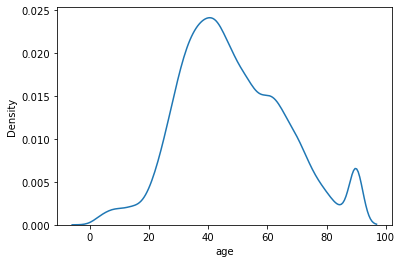

In [48]:
sns.kdeplot(data['age'])

<AxesSubplot:xlabel='age'>

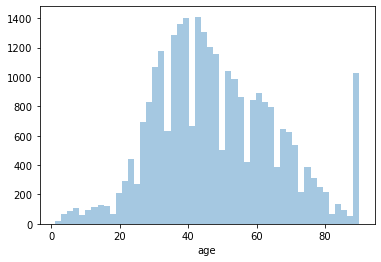

In [62]:
sns.distplot(data['age'], kde = False)

<AxesSubplot:xlabel='age', ylabel='Density'>

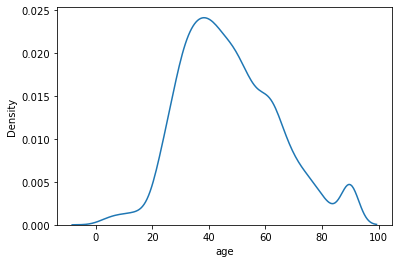

In [50]:
sns.kdeplot(churn_age)

<AxesSubplot:xlabel='age', ylabel='Density'>

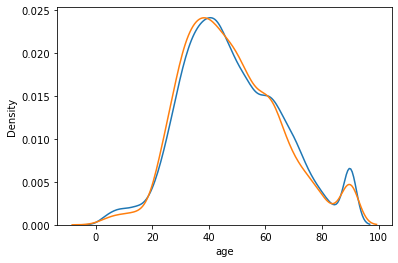

In [51]:
sns.kdeplot(data['age'])
sns.kdeplot(churn_age)

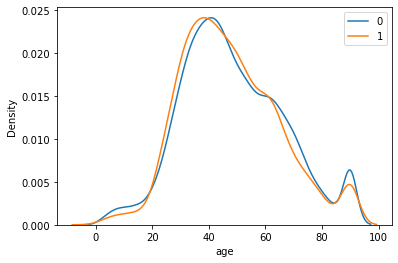

In [52]:
# for both churn and not churn

for i in data['churn'].unique():
    v = data.loc[data['churn'] == i, 'age']
    sns.kdeplot(v, label = i)
    
plt.legend()

In [53]:
data['churn'].value_counts(normalize = True)

0    0.814671
1    0.185329
Name: churn, dtype: float64

In [54]:
#current balance mean
print(data['current_balance'].mean())

#current balance of customers who are likely to churn
print(data[data['churn'] == 1]['current_balance'].mean())

7380.551803607912
5220.884321292768


<AxesSubplot:xlabel='current_balance', ylabel='Density'>

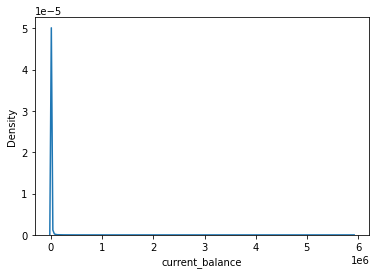

In [55]:
sns.kdeplot(data[data['churn'] == 0]['current_balance'])

<AxesSubplot:xlabel='current_balance', ylabel='Density'>

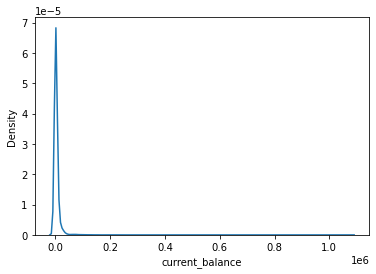

In [56]:
sns.kdeplot(data[data['churn'] == 1]['current_balance'])

<AxesSubplot:xlabel='current_balance', ylabel='Density'>

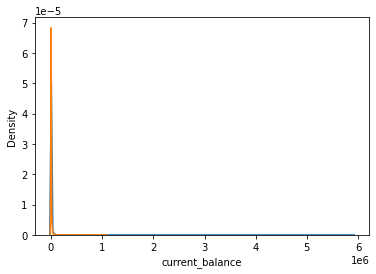

In [57]:
sns.kdeplot(data[data['churn'] == 0]['current_balance'])
sns.kdeplot(data[data['churn'] == 1]['current_balance'])

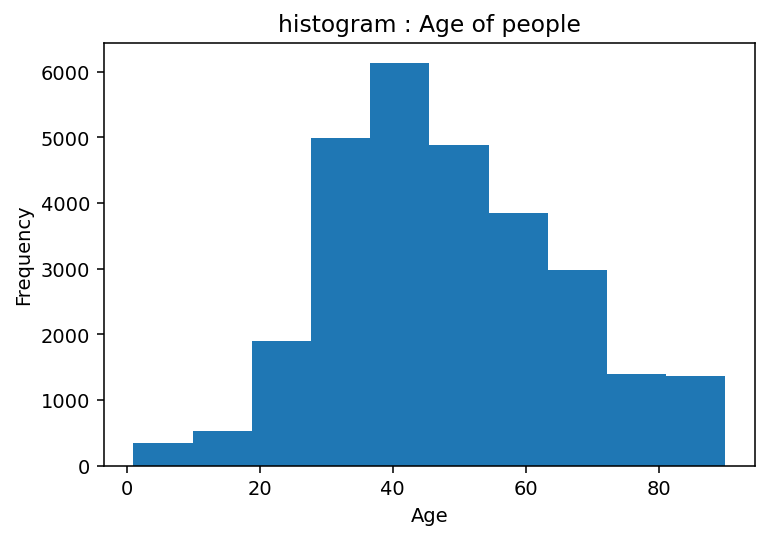

In [64]:
plt.figure(dpi = 140)

plt.hist(data['age'])

plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("histogram : Age of people")

plt.show()

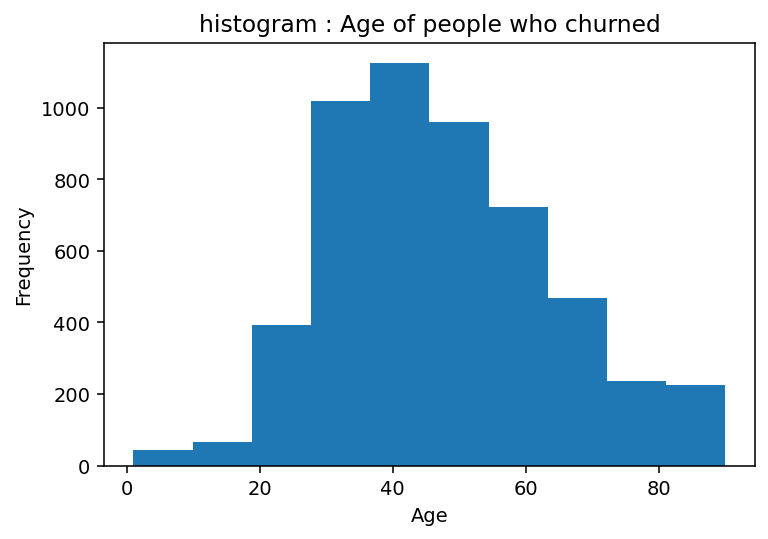

In [37]:
plt.figure(dpi = 140)

plt.hist(churn_age)

plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("histogram : Age of people who churned")

plt.show()

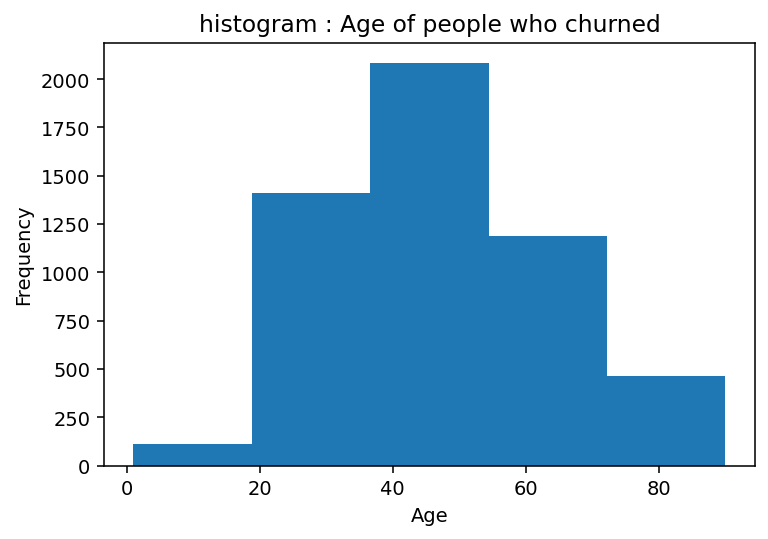

In [39]:
# plotting histogram with 5 bins

plt.figure(dpi = 140)

plt.hist(churn_age, bins = 5)

plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("histogram : Age of people who churned")

plt.show()

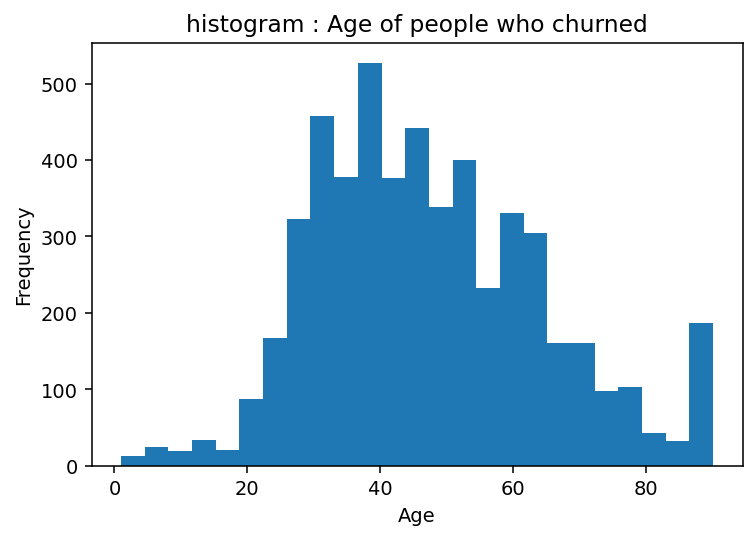

In [40]:
# plotting histogram with 25 bins

plt.figure(dpi = 140)

plt.hist(churn_age, bins = 25)

plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("histogram : Age of people who churned")

plt.show()

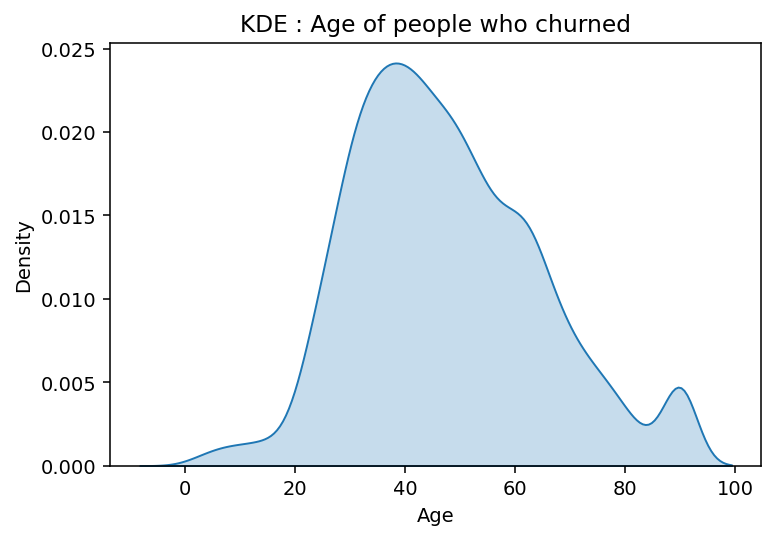

In [41]:
# plotting KdE plot using Seaborn

plt.figure(dpi = 140)

sns.kdeplot(churn_age, shade = True)

plt.xlabel("Age")
plt.ylabel('Density')
plt.title("KDE : Age of people who churned")

plt.show()

In [42]:
# calculating points of mean, median and standard deviation

mean = churn_age.mean()
median = churn_age.median()
stdev = churn_age.std()
within_one_stdev = churn_age.mean() - churn_age.std(), churn_age.mean() + churn_age.std() 

# checking
mean, median, stdev, within_one_stdev

(47.461216730038025,
 45.0,
 17.17597414675194,
 (30.285242583286085, 64.63719087678996))

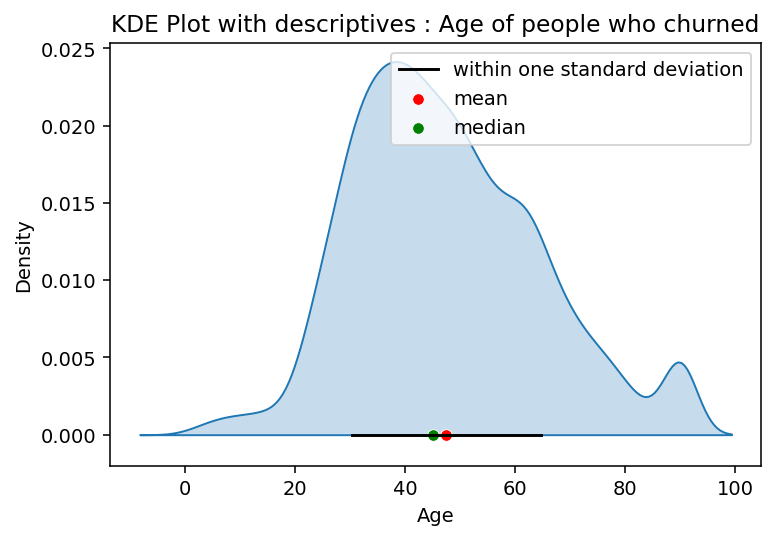

In [47]:
plt.figure(dpi = 140)
sns.kdeplot(churn_age, shade = True)

sns.scatterplot(x = [mean], y = [0], color = 'red', label = 'mean')
sns.scatterplot(x = [median], y = [0], color = 'green', label = 'median')

sns.lineplot(x = within_one_stdev, y = [0, 0], color = 'black', label = 'within one standard deviation')

plt.ylim(bottom = -.002)

plt.xlabel("Age")
plt.ylabel('Density')
plt.title("KDE Plot with descriptives : Age of people who churned")

plt.show()

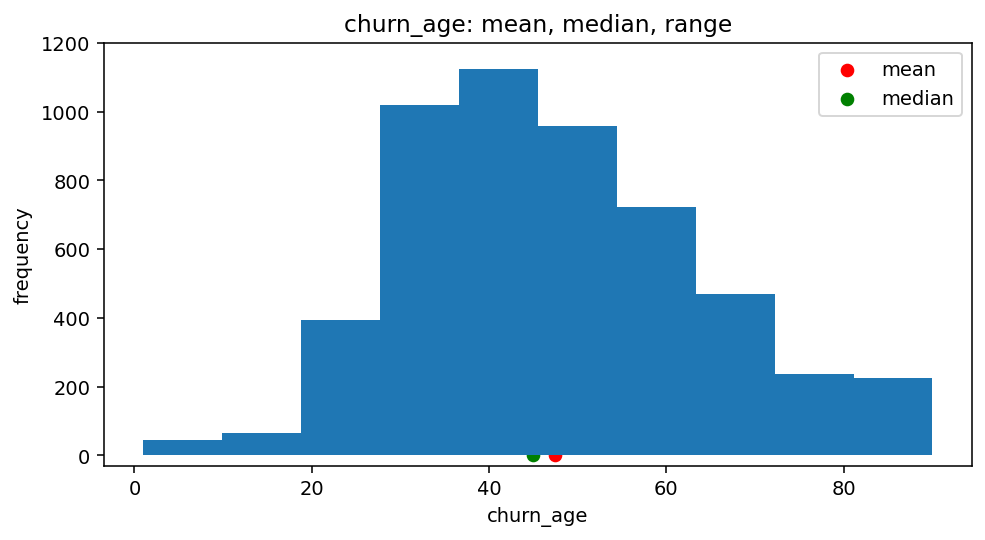

In [58]:
# setting image resolution
plt.figure(figsize = (8,4), dpi = 140)

# Plotting histogram and descriptive summary
plt.scatter(churn_age.mean(), 0, label = 'mean', color = 'red') 
plt.scatter(churn_age.median(), 0, label = 'median', color = 'green')
plt.hist(churn_age, bins = 10)

#y-axis limits to make mean and median visible
plt.ylim(-30, 1200)

plt.xlabel('churn_age')
plt.ylabel('frequency')
plt.title('churn_age: mean, median, range')
plt.legend()

In [59]:
#Mean Value is higher than the Median Value
#The peak occurs at the interval (36,45) that means highest number of customers age lie in this interval
#Most customer age is between 30 and 65

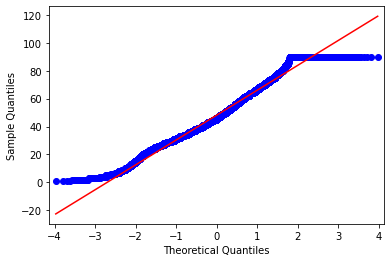

In [66]:
#qq plot explain
sm.qqplot(data['age'], line = 's') 
py.show() 

Larger values are not as large/extreme as expected from a Normal Distribution

Smaller values are not as smaller/extreme as expected from a Normal Distribution

So, it follows normal distribution

In [67]:
data['age'].skew()

0.33058929557517264

In [68]:
# Since skewness is less than 0.5 --> Normal Dist

Skewness is around 0.33.
Age of Cusotmers follows a Normal like Distribution

In [69]:
data['age'].kurtosis()

-0.16866785691275865

In [70]:
#Kurtosis Value is also close to Zero.
#This means tails are not as dense as compared to Normal Distribution.
#There are less values available along the tails.